$(1,0)$
- Differences: $-127<x2<130, -132<x1<131$ (101 instances)
- RL: $-138<x2<146, -144<x1<142$
    - CF: $x2≤-128 \rightarrow (1,1)$
    - CF: $x2≥133 \rightarrow (1,1)$
    - CF: $x1≤-144 \rightarrow (1,1)$
    - CF: $x1≥135 \rightarrow (1,1)$
    - RLL: $-112<x1<106$ (50 instances different)
        - CF: $x1≤-122 \rightarrow (1,1)$
        - CF: $x1≥109 \rightarrow (1,1)$
    - RLRR: $-121<x1<112$ (51 instances different)
        - CF: $x2≤-104 \rightarrow (1,1)$
        - CF: $x2≥101 \rightarrow (1,1)$

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import cloudpickle
import matplotlib.pyplot as plt
from IPython.display import display
import shap
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering, plot_dendrogram
from tasks.gaussian_quantiles import make_task

In [2]:
try:
    with open('shap-values.pickle', 'rb') as f:
        explanations, indices_nonfinite_predictions, explanations_nonfinite = pickle.load(f)
    print('Loaded state')
except FileNotFoundError:
    pass

Loaded state


In [3]:
clf_a, clf_b, X, y, feature_names = make_task()

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [5]:
%%time
masker = shap.maskers.Independent(data=X, max_samples=X.shape[0])
explanations, indices_nonfinite_predictions, explanations_nonfinite = \
    generate_shap_explanations(comparer, X, masker=masker,
                               explanation_types=['indiv', 'indiv_diff', 'mclass_diff'],
                               space_types=['log_odds'])

Exact explainer: 601it [00:41, 12.49it/s]                         
Exact explainer: 601it [00:30, 13.35it/s]                         
Exact explainer: 601it [01:03,  7.80it/s]                         

CPU times: user 2min 5s, sys: 1.62 s, total: 2min 7s
Wall time: 2min 14s


In [6]:
with open('shap-values.pickle', 'wb') as f:
    pickle.dump((explanations, indices_nonfinite_predictions, explanations_nonfinite), f, pickle.HIGHEST_PROTOCOL)

In [5]:
xlim = explanations.data[:, 0].min() - 0.5, explanations.data[:, 0].max() + 0.5
ylim = explanations.data[:, 1].min() - 0.5, explanations.data[:, 1].max() + 0.5

# Traditional SHAP Explanations

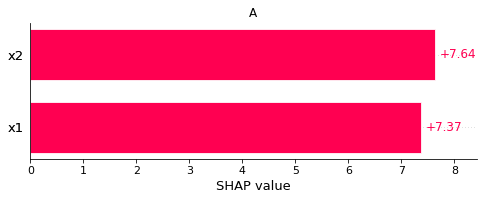

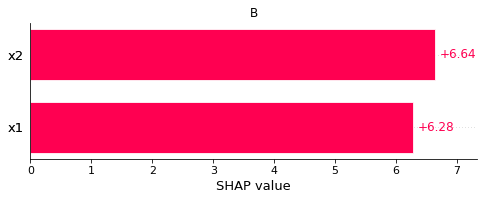

In [6]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [7]:
feature_order, _ = calc_feature_order(explanations.indiv.log_odds[:, :, 1])

In [8]:
node, Z = make_clustering(comparer, explanations.indiv[:, :, 1])

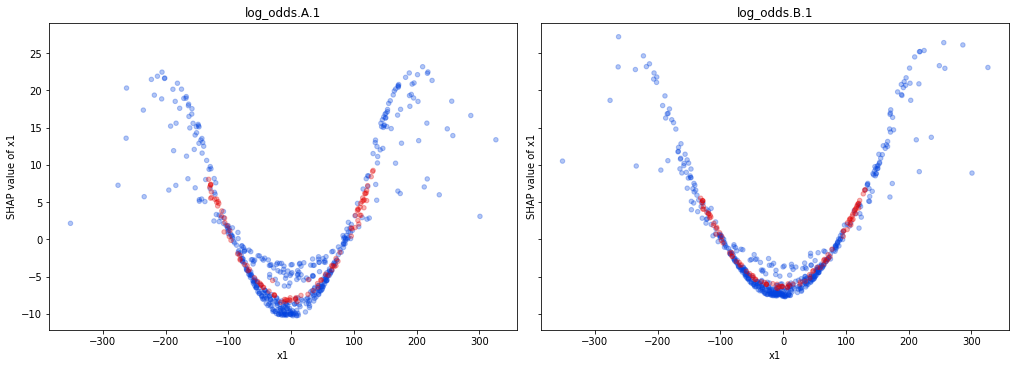

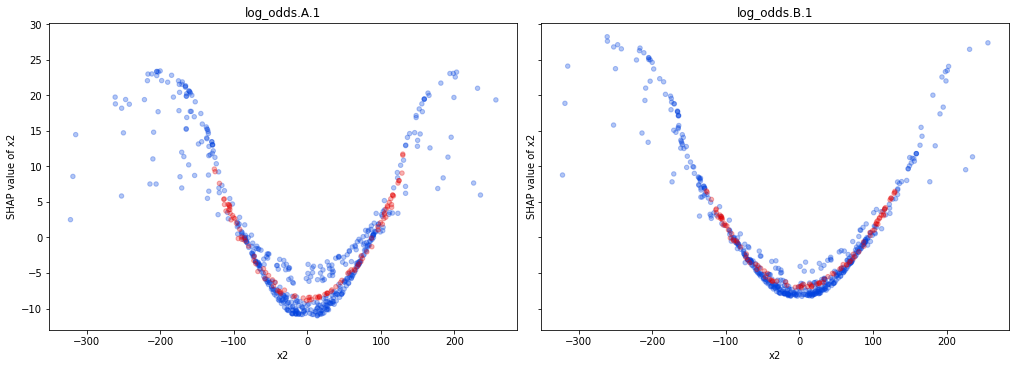

In [10]:
for feature in feature_names:
    node.plot_feature(feature, alpha=0.3)

# Difference Classifier SHAP Explanations

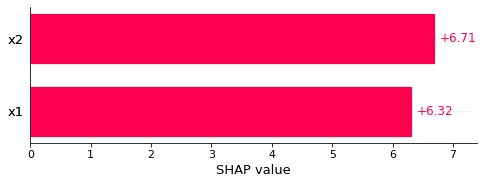

In [6]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.log_odds)
plot_feature_importance_bar(feature_importances)

In [7]:
global_feature_order = feature_order

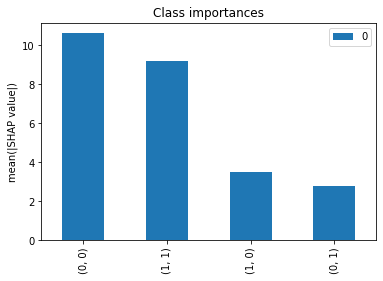

In [8]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.log_odds)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

## Clustering of Class $(1,0)$ SHAP Values

In [9]:
node, Z = make_clustering(comparer, explanations.mclass_diff.log_odds, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])

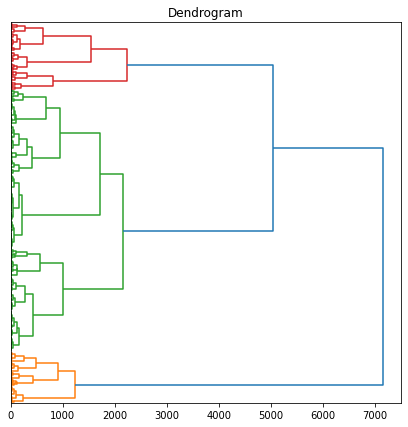

In [10]:
plot_dendrogram(Z)

### Node RL

In [65]:
node.class_counts, node.distance

((0, 0)    259
 (1, 1)    240
 (1, 0)    101
 dtype: int64,
 7155.744603299222)

In [66]:
node = node.get_right()
node.class_counts, node.distance

((0, 0)    259
 (1, 1)    159
 (1, 0)    101
 dtype: int64,
 5051.383769607136)

In [67]:
node = node.get_left()
node.class_counts, node.distance

((0, 0)    259
 (1, 0)    101
 (1, 1)     54
 dtype: int64,
 2153.4121830001604)

In [68]:
node.get_left().class_counts

(0, 0)    77
(1, 0)    50
(1, 1)    34
dtype: int64

-131.33844202155564 <= x1 <= 130.61962226695064
x1 <= -144.0 --> {'(1, 1)': 101}
x1 >= 135.0 --> {'(1, 1)': 101}


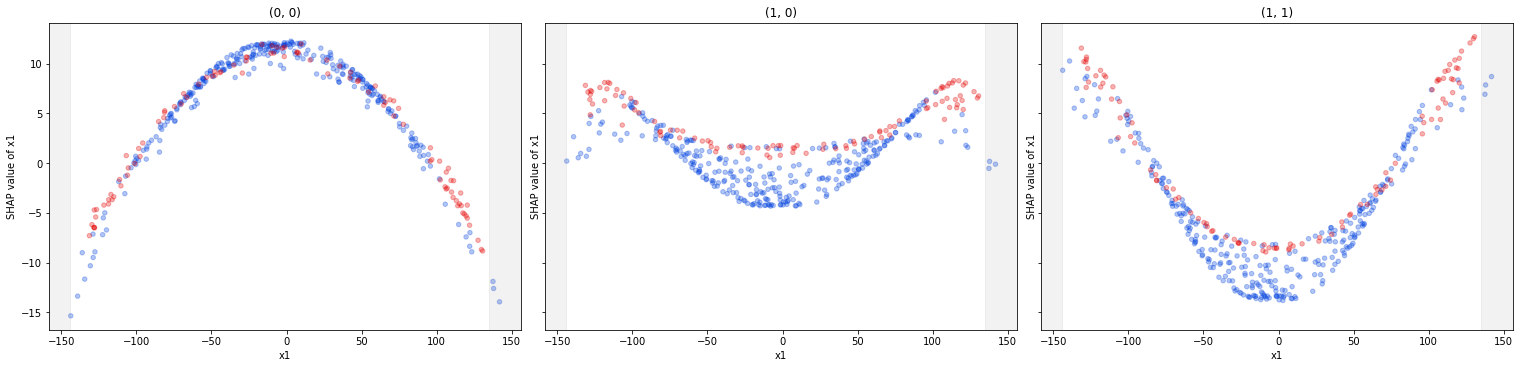

-126.41356491347094 <= x2 <= 129.7495758596666
x2 <= -128.0 --> {'(1, 1)': 101}
x2 >= 133.0 --> {'(1, 1)': 101}


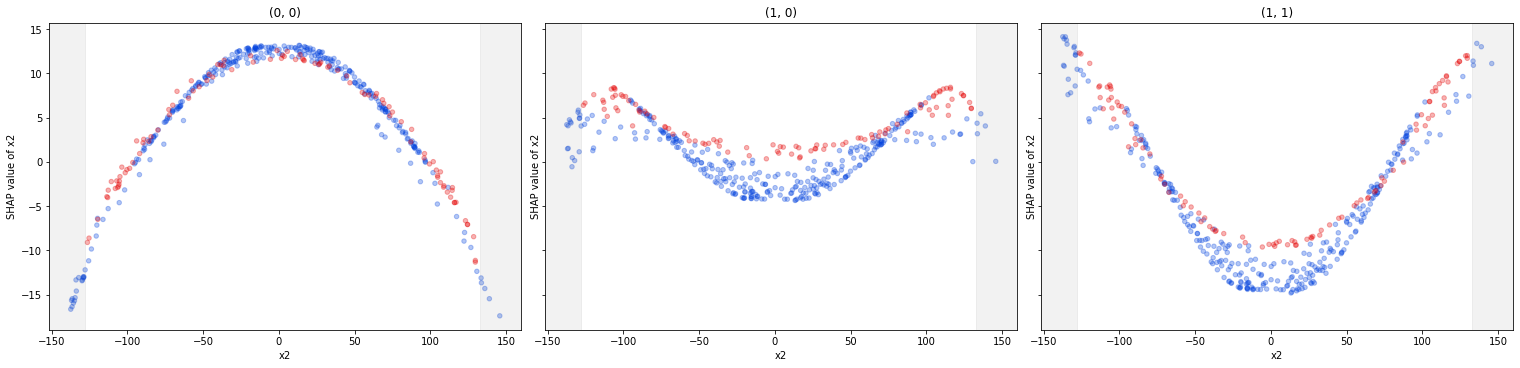

In [33]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.plot_feature(feature, focus=node, alpha=0.3)

-131.33844202155564 <= x1 <= 130.61962226695064
x1 <= -144.0 --> {'(1, 1)': 101}
x1 >= 135.0 --> {'(1, 1)': 101}


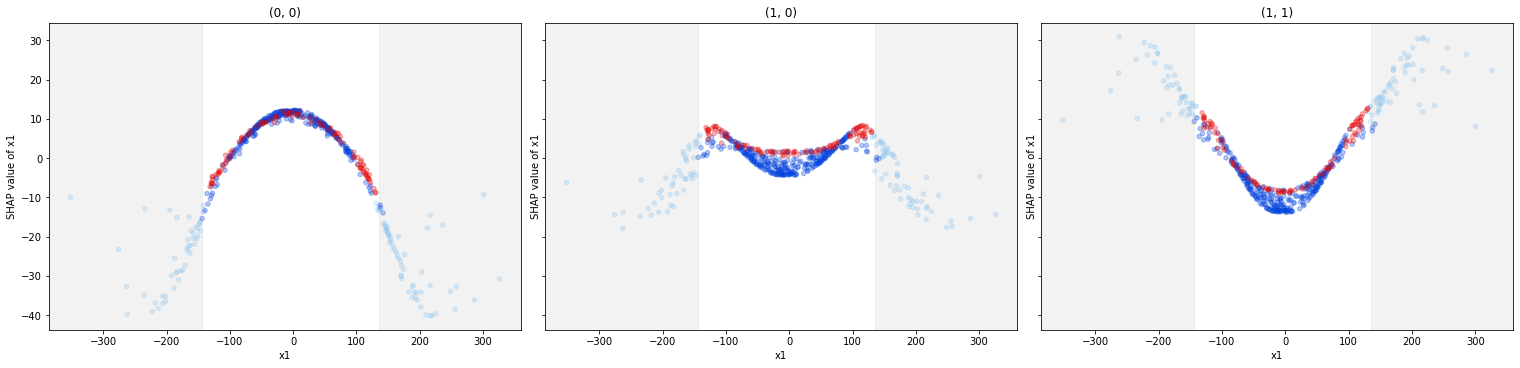

-126.41356491347094 <= x2 <= 129.7495758596666
x2 <= -128.0 --> {'(1, 1)': 101}
x2 >= 133.0 --> {'(1, 1)': 101}


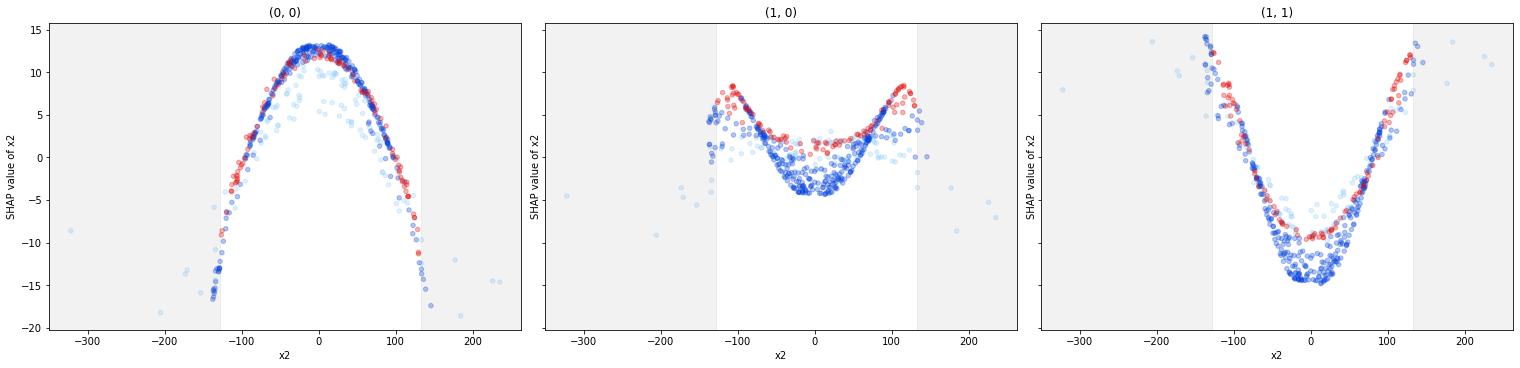

In [34]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.plot_feature(feature, focus=node, alpha=0.3)

-131.33844202155564 <= x1 <= 130.61962226695064
x1 <= -144.0 --> {'(1, 1)': 101}
x1 >= 135.0 --> {'(1, 1)': 101}


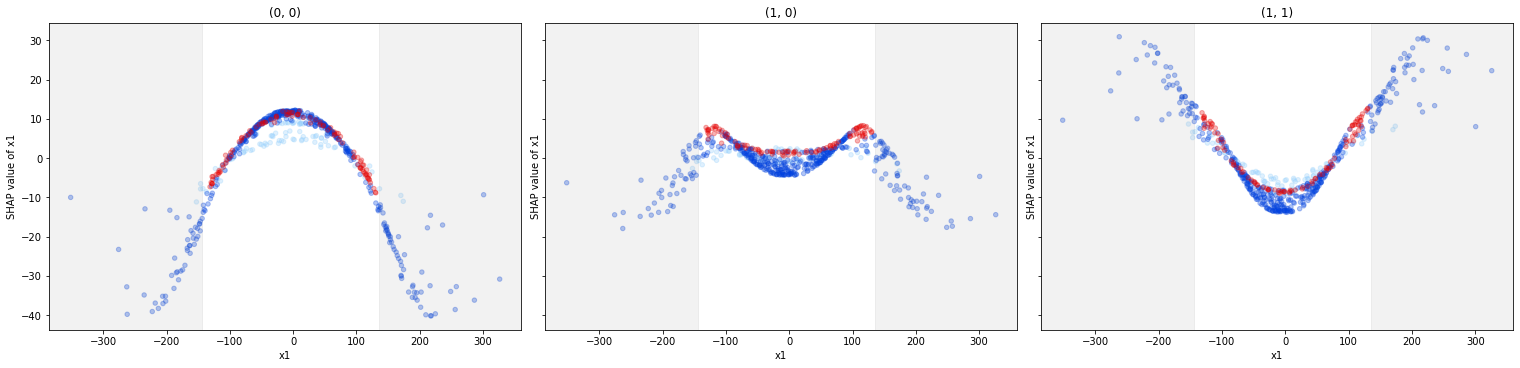

-126.41356491347094 <= x2 <= 129.7495758596666
x2 <= -128.0 --> {'(1, 1)': 101}
x2 >= 133.0 --> {'(1, 1)': 101}


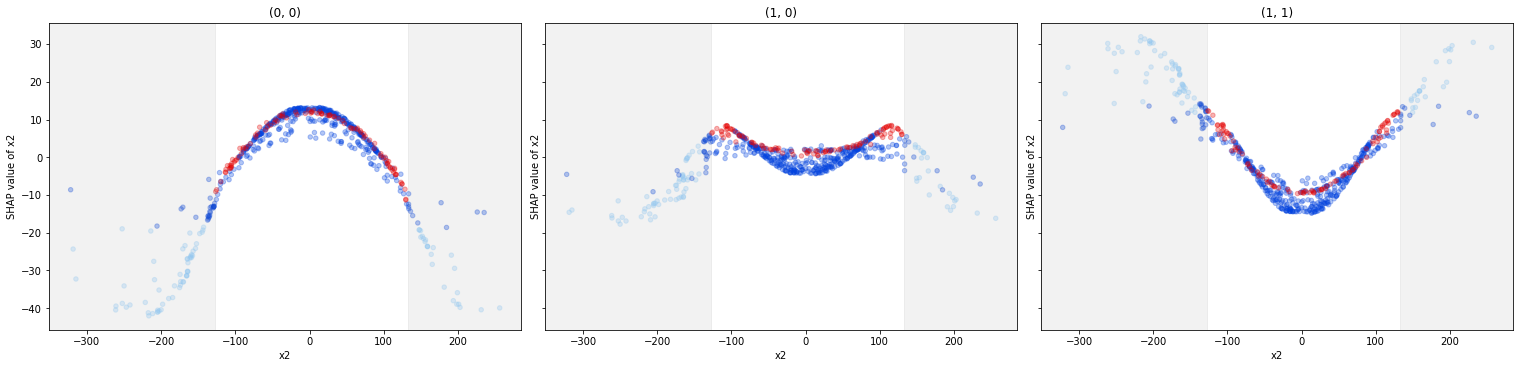

In [35]:
for feature in feature_names:
    node.parent.describe_feature_differences(feature)
    node.parent.describe_counterfactuals(feature)
    node.root.plot_feature(feature, focus=node.parent, alpha=0.3)

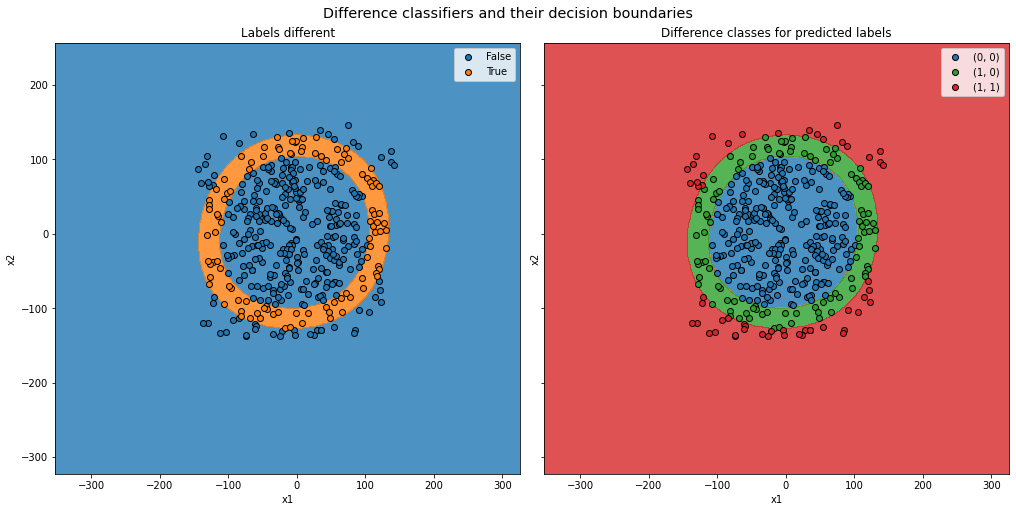

In [70]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

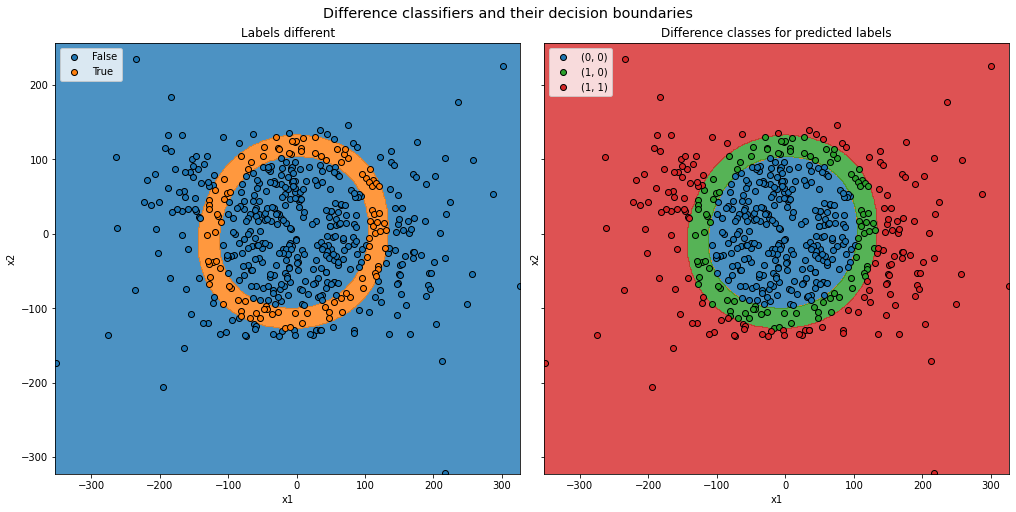

In [25]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

### Node RLL

In [69]:
node = node.get_left()
node.class_counts, node.distance

((0, 0)    77
 (1, 0)    50
 (1, 1)    34
 dtype: int64,
 1008.5755069618963)

In [70]:
node.get_left().class_counts

(0, 0)    77
(1, 0)    41
dtype: int64

-85.21550165878162 <= x1 <= 77.85447754205681
x1 <= -122.0 --> {'(1, 1)': 50}
x1 >= 109.0 --> {'(1, 1)': 50}


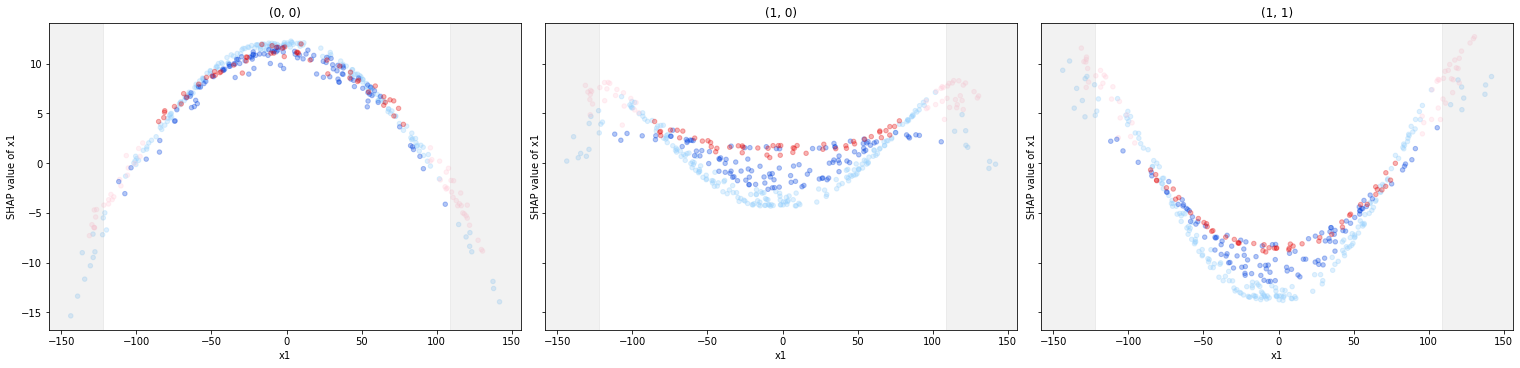

-126.41356491347094 <= x2 <= 129.7495758596666
x2 <= -128.0 --> {'(1, 1)': 50}
x2 >= 133.0 --> {'(1, 1)': 50}


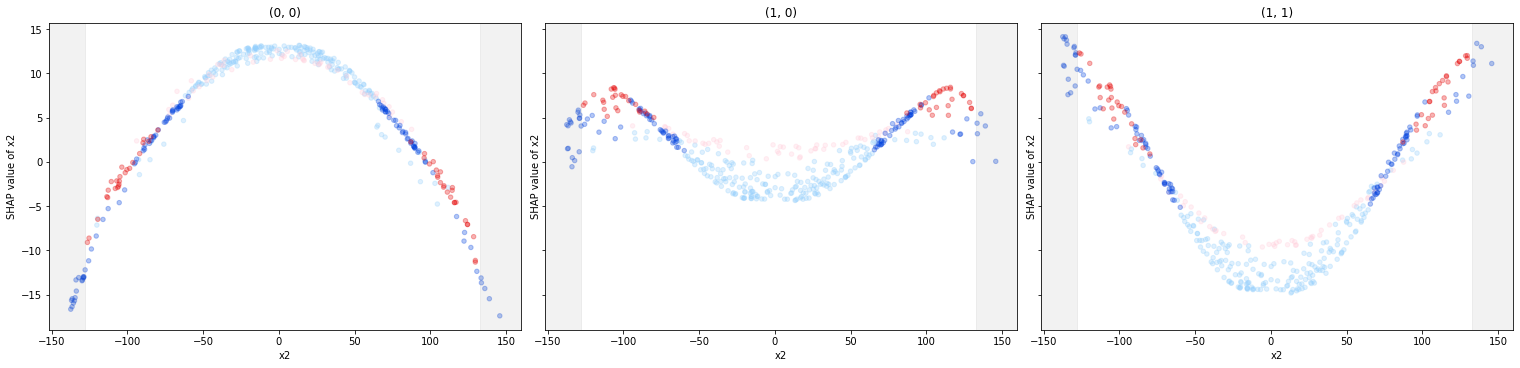

In [40]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.plot_feature(feature, focus=node, alpha=0.3)

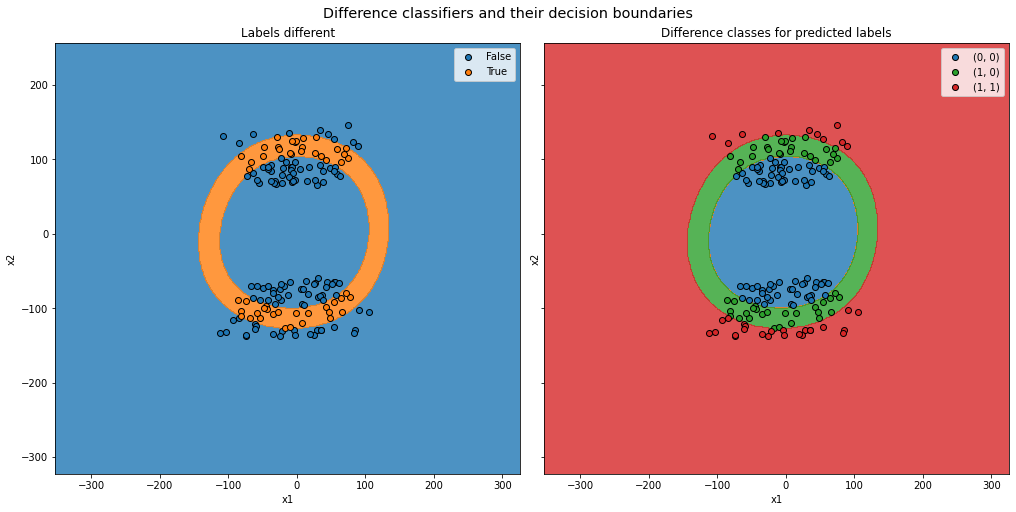

In [106]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

### Node RLLLR

In [71]:
node = node.get_left()
node.class_counts, node.distance

((0, 0)    77
 (1, 0)    41
 dtype: int64,
 427.7566940166369)

In [72]:
node = node.get_right()
node.class_counts, node.distance

((1, 0)    41
 (0, 0)    12
 dtype: int64,
 269.55779843029006)

In [73]:
node.get_left().class_counts

(1, 0)    25
(0, 0)     6
dtype: int64

-85.21550165878162 <= x1 <= 77.85447754205681
x1 <= -122.0 --> {'(1, 1)': 41}
x1 >= 109.0 --> {'(1, 1)': 41}


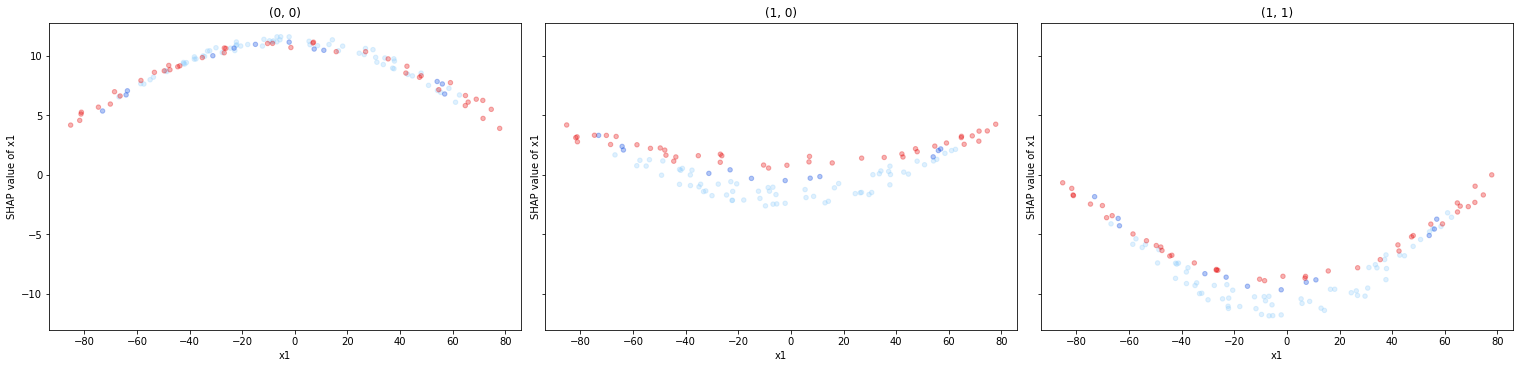

-113.56328621239042 <= x2 <= 117.02433684190137
x2 <= -128.0 --> {'(1, 1)': 41}
x2 >= 133.0 --> {'(1, 1)': 41}


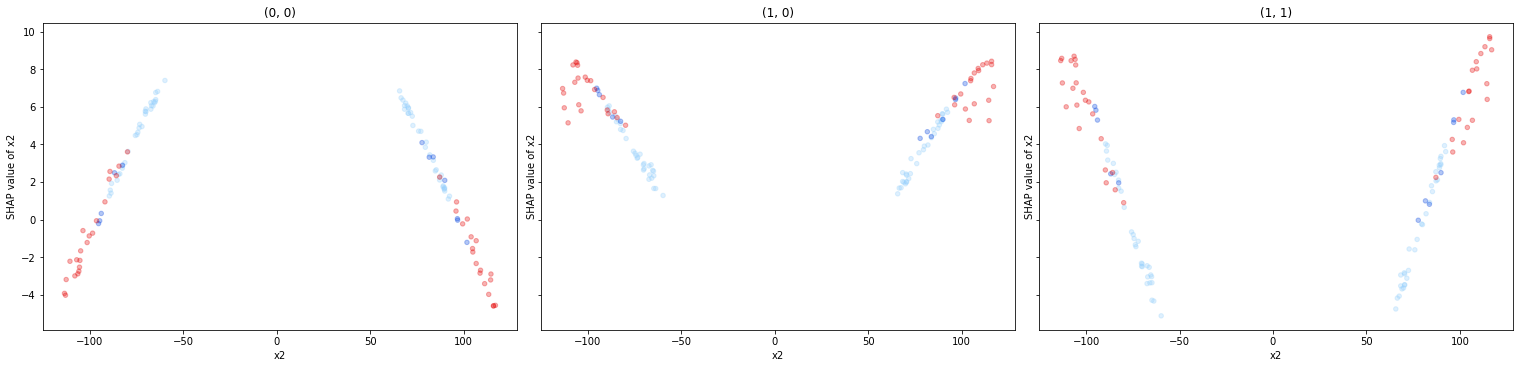

In [95]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.plot_feature(feature, focus=node, alpha=0.3)

-85.21550165878162 <= x1 <= 77.85447754205681
x1 <= -122.0 --> {'(1, 1)': 41}
x1 >= 109.0 --> {'(1, 1)': 41}


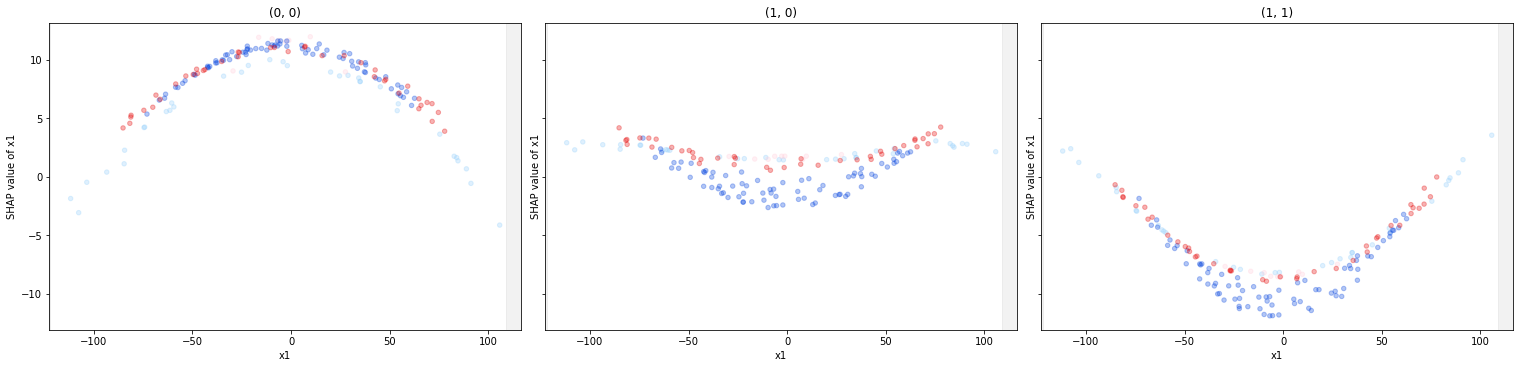

-113.56328621239042 <= x2 <= 117.02433684190137
x2 <= -128.0 --> {'(1, 1)': 41}
x2 >= 133.0 --> {'(1, 1)': 41}


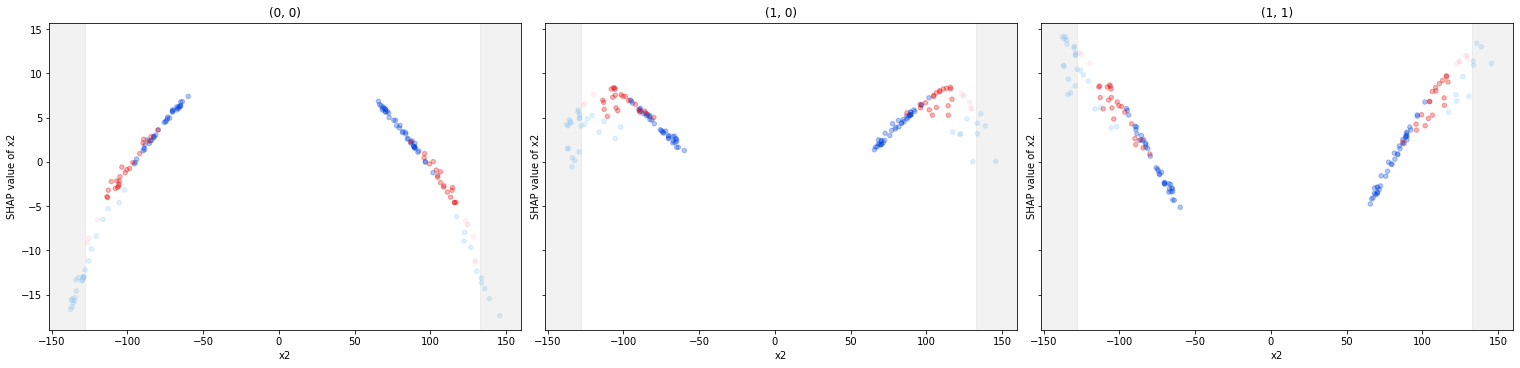

In [47]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.parent.plot_feature(feature, focus=node.parent, alpha=0.3)

Comparing the next level's dependence plots to the previous, it's clear that the explanation doesn't get much better with deeper levels. I will go down the hierarchy more to demonstrate a weakness of this method.

But I can also manually create counterfactuals for instances where x2<0 and >=0:

In [23]:
part = node.filter(node.shap_values[:, 'x2'].data < 0)
for feature in feature_names:
    part.describe_feature_differences(feature)
    part.describe_counterfactuals(feature)

-85.21550165878162 <= x1 <= 77.85447754205681
x1 <= -122.0 --> {'(1, 1)': 22}
x1 >= 105.0 --> {'(1, 1)': 22}
-113.56328621239042 <= x2 <= -79.87248410506523
x2 <= -128.0 --> {'(1, 1)': 22}
x2 >= -67.0 --> {'(0, 0)': 22}


In [24]:
part = node.filter(node.shap_values[:, 'x2'].data >= 0)
for feature in feature_names:
    part.describe_feature_differences(feature)
    part.describe_counterfactuals(feature)

-81.76632338846144 <= x1 <= 74.6479354034524
x1 <= -106.0 --> {'(1, 1)': 19}
x1 >= 109.0 --> {'(1, 1)': 19}
87.1887706640731 <= x2 <= 117.02433684190137
x2 <= 69.0 --> {'(0, 0)': 19}
x2 >= 133.0 --> {'(1, 1)': 19}


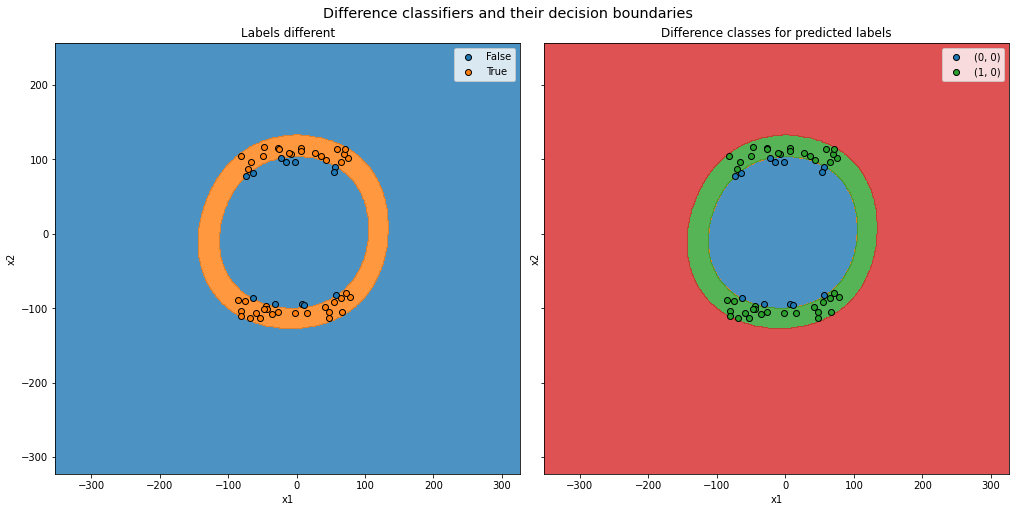

In [48]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

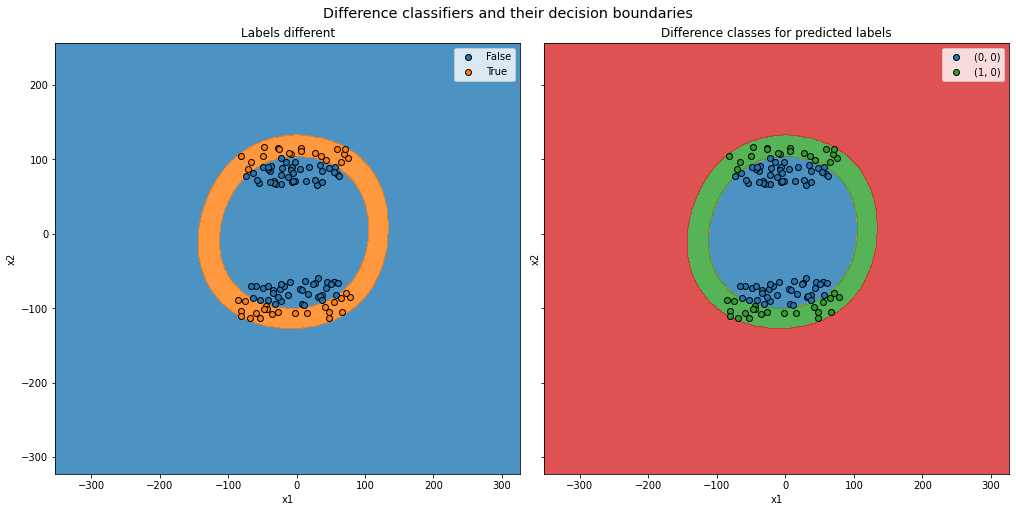

In [49]:
comparer.plot_decision_boundaries(node.parent.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

In [75]:
node = node.get_left()
node.class_counts, node.distance

((1, 0)    25
 (0, 0)     6
 dtype: int64,
 78.69103166227512)

-68.53396982691486 <= x1 <= 59.13543068040621
x1 <= -105.0 --> {'(1, 1)': 25}
x1 >= 97.0 --> {'(1, 1)': 25}


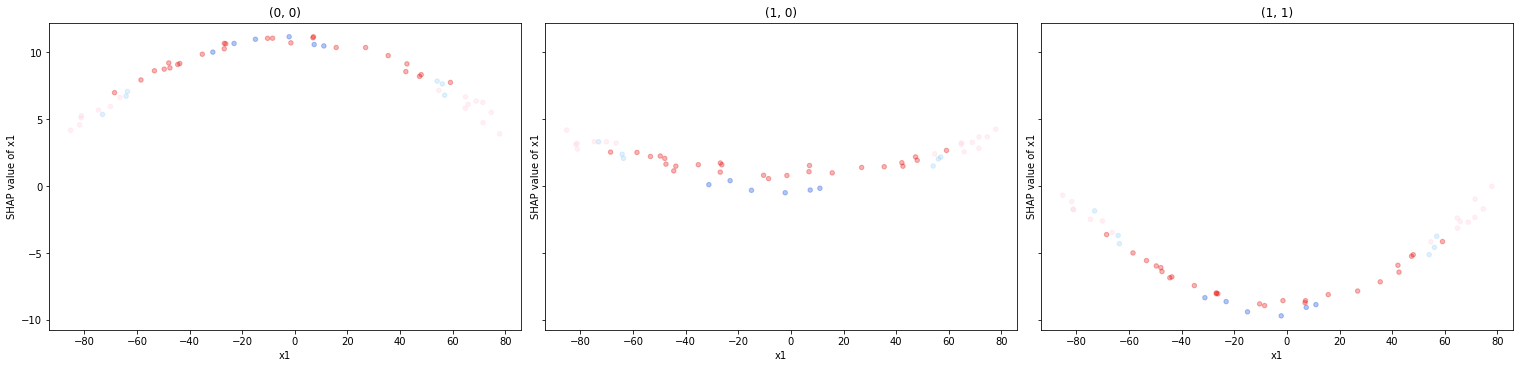

-113.56328621239042 <= x2 <= 117.02433684190137
x2 <= -128.0 --> {'(1, 1)': 25}
x2 >= 133.0 --> {'(1, 1)': 25}


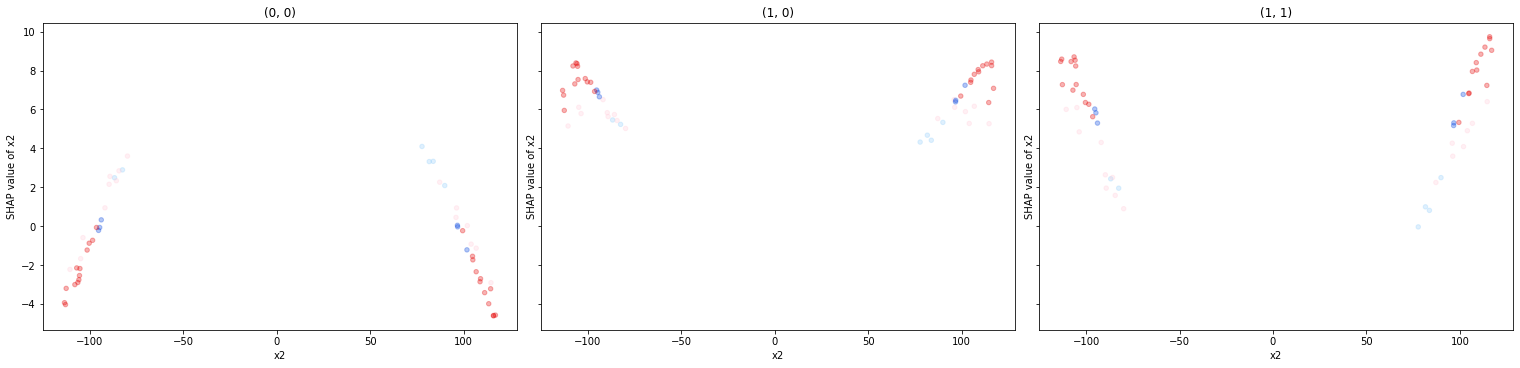

In [88]:
for feature in feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.plot_feature(feature, focus=node, alpha=0.3)

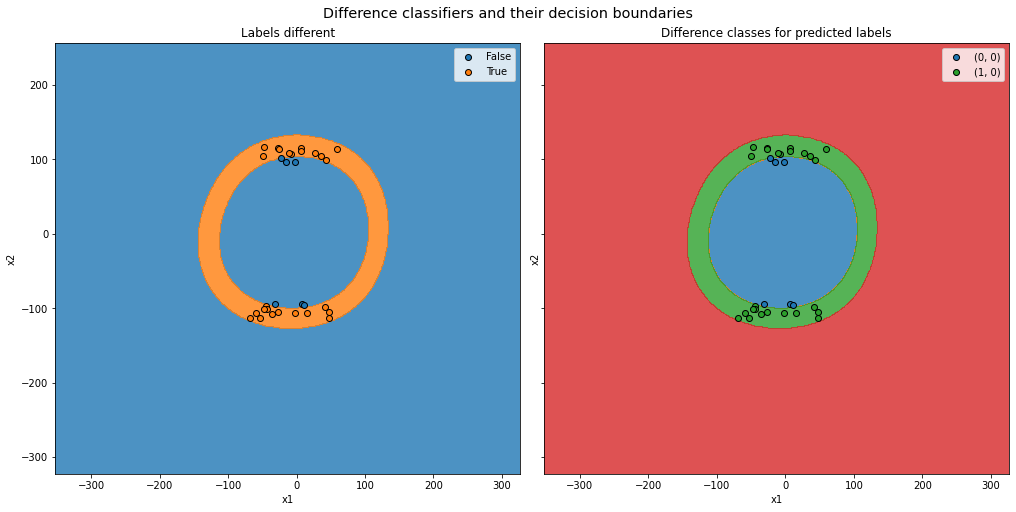

In [76]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

In [77]:
node = node.get_left()
node.class_counts, node.distance

((1, 0)    14
 dtype: int64,
 33.41587069791697)

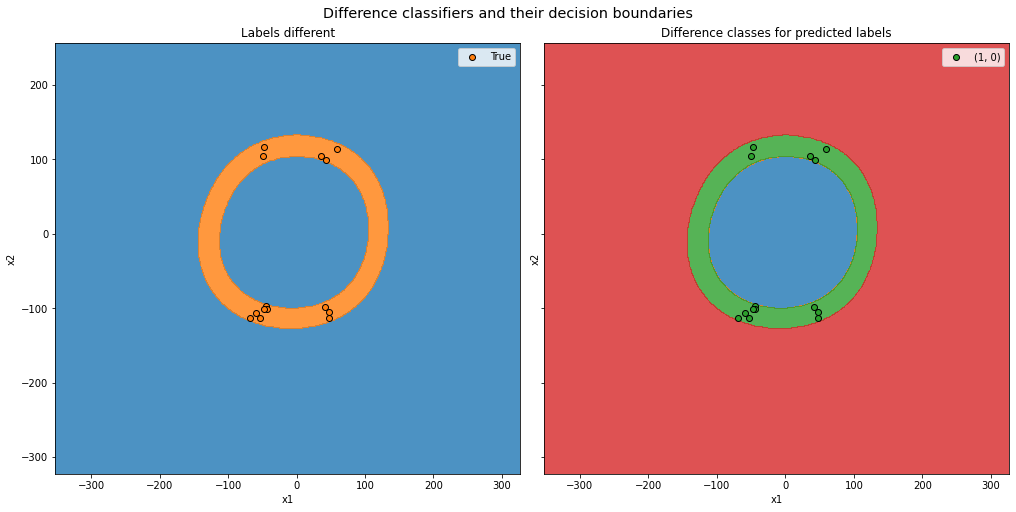

In [78]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

In [79]:
node = node.get_left()
node.class_counts, node.distance

((1, 0)    7
 dtype: int64,
 6.731275958931217)

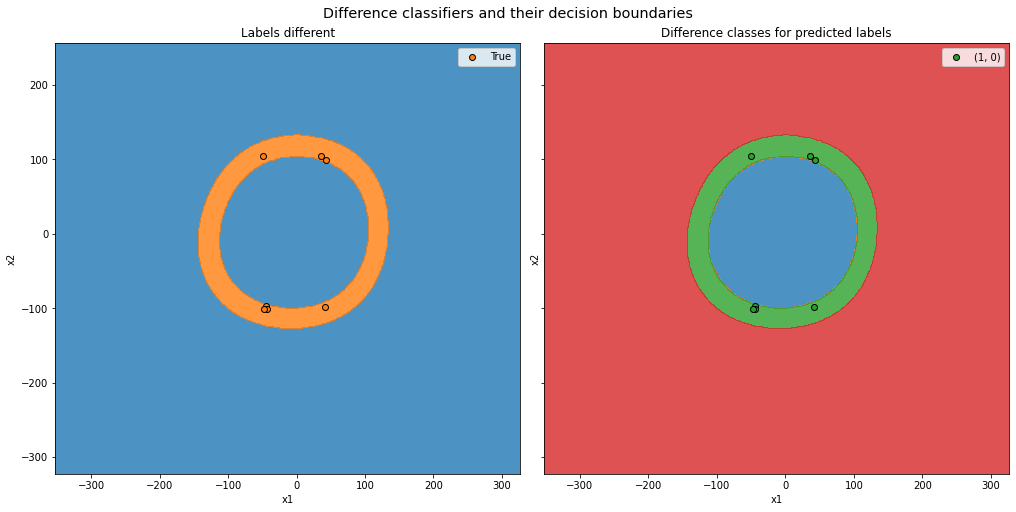

In [80]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

In [81]:
node = node.get_left()
node.class_counts, node.distance

((1, 0)    2
 dtype: int64,
 0.4731605350118516)

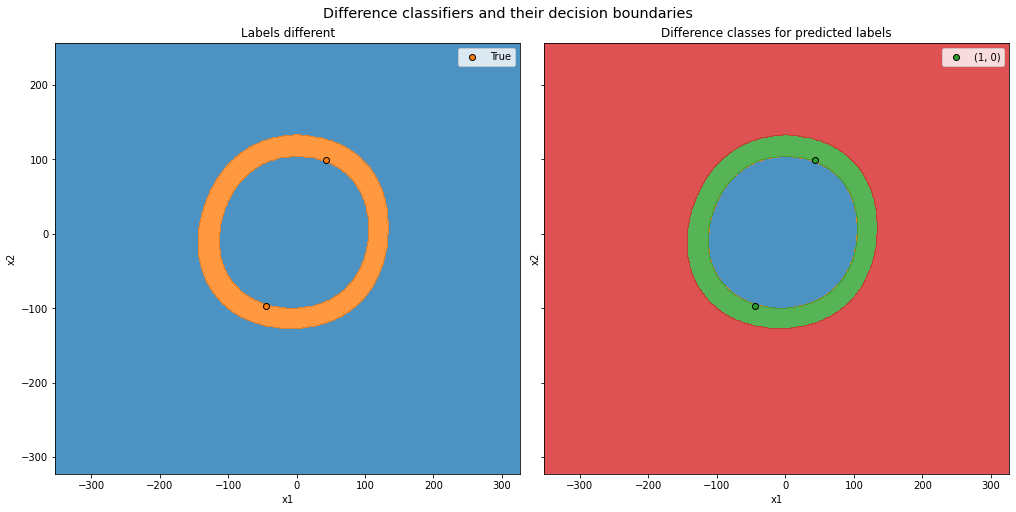

In [82]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

We can see, that even at this level, instances from the upper part of the ring and the lower part are not split. This might be the main drawback of this method. The reason is, that the clustering algorithm is based on the SHAP Values only. It does not enable splitting across original feature values. So we are getting an incomplete explanation for this type of difference.

### Node RLRR

In [89]:
node = node.root.get('RLR')
node.class_counts, node.distance

((0, 0)    182
 (1, 0)     51
 (1, 1)     20
 dtype: int64,
 1713.5122482581849)

In [90]:
node = node.get_right()
node.class_counts, node.distance

((0, 0)    62
 (1, 0)    51
 (1, 1)    20
 dtype: int64,
 949.6286373704477)

In [91]:
node.get_left().class_counts

(0, 0)    60
(1, 0)    17
dtype: int64

-131.33844202155564 <= x1 <= 130.61962226695064
x1 <= -144.0 --> {'(1, 1)': 51}
x1 >= 135.0 --> {'(1, 1)': 51}


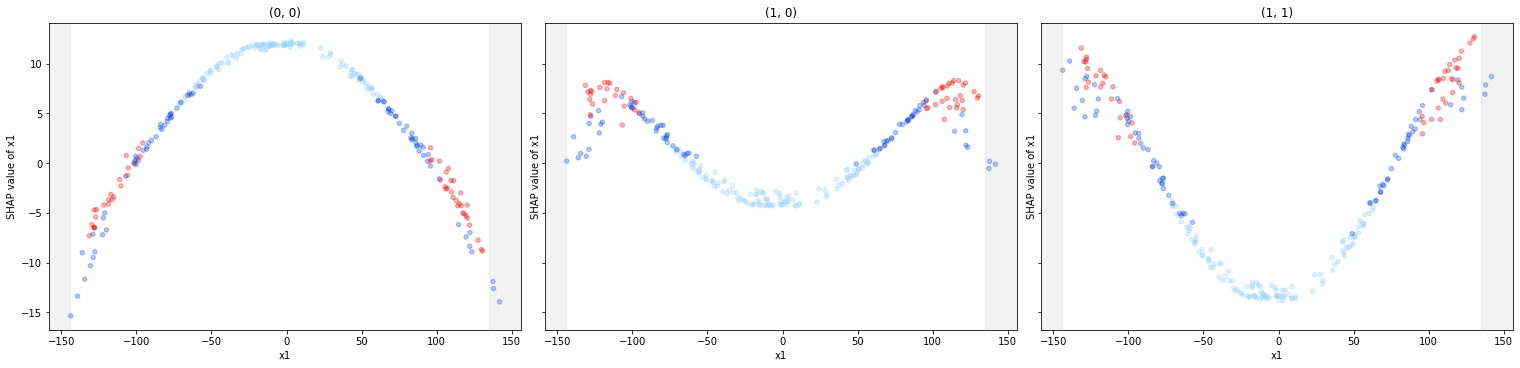

-93.91635868328355 <= x2 <= 87.70368295639693
x2 <= -104.0 --> {'(1, 1)': 51}
x2 >= 101.0 --> {'(1, 1)': 51}


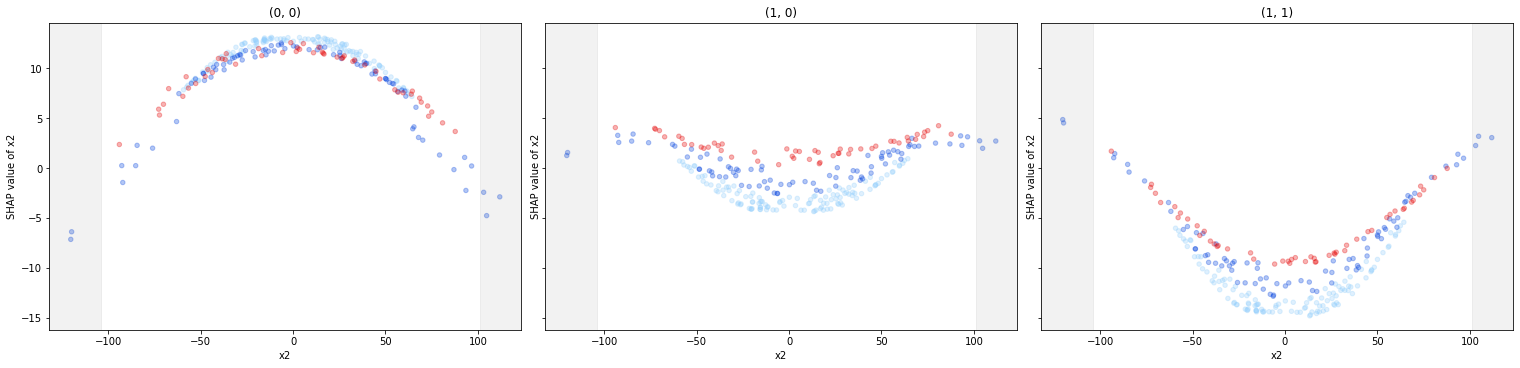

In [92]:
for feature in comparer.feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.plot_feature(feature, focus=node, alpha=0.3)

-131.33844202155564 <= x1 <= 130.61962226695064
x1 <= -144.0 --> {'(1, 1)': 51}
x1 >= 135.0 --> {'(1, 1)': 51}


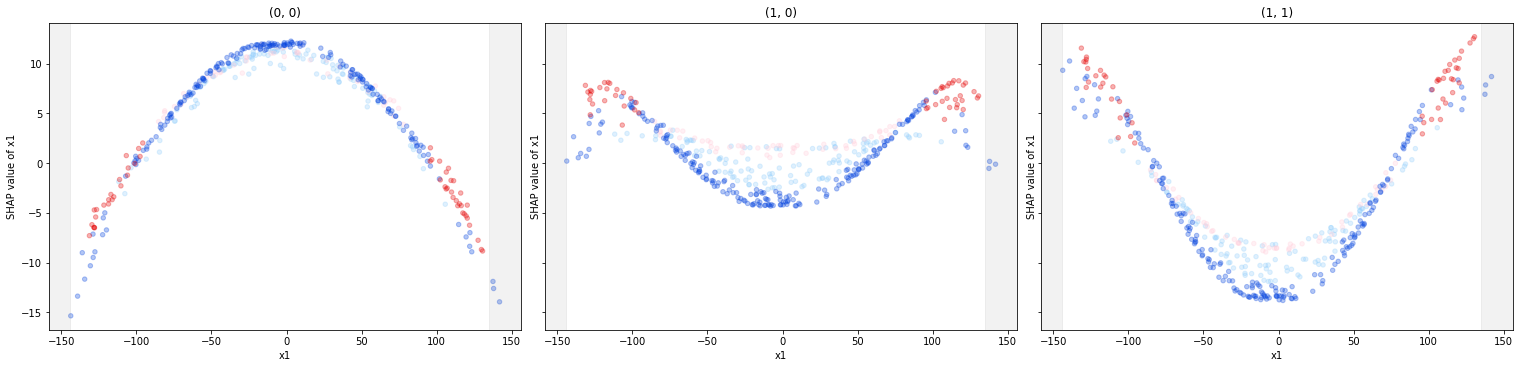

-93.91635868328355 <= x2 <= 87.70368295639693
x2 <= -104.0 --> {'(1, 1)': 51}
x2 >= 101.0 --> {'(1, 1)': 51}


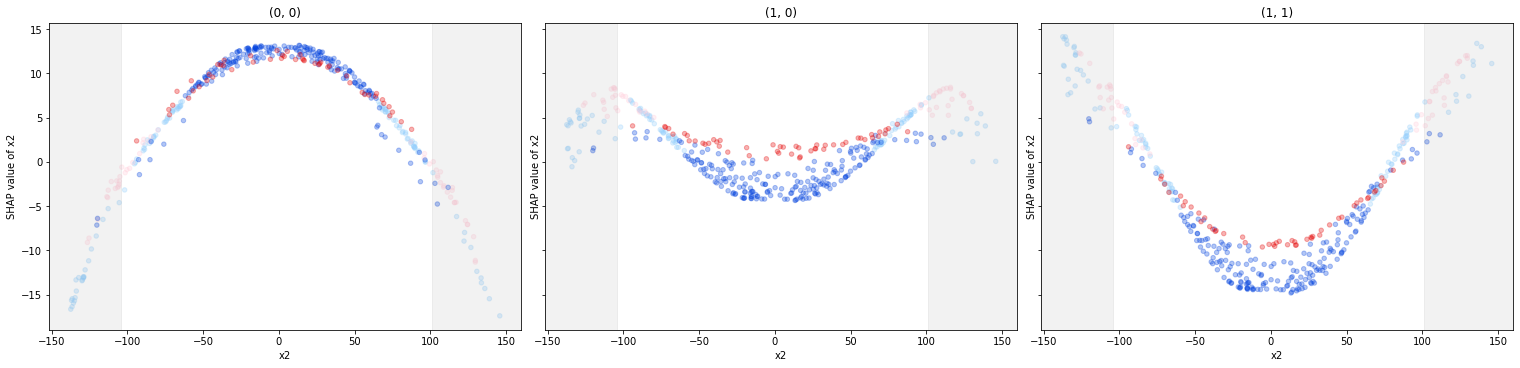

In [93]:
for feature in comparer.feature_names:
    node.describe_feature_differences(feature)
    node.describe_counterfactuals(feature)
    node.parent.parent.plot_feature(feature, focus=node.parent, alpha=0.3)

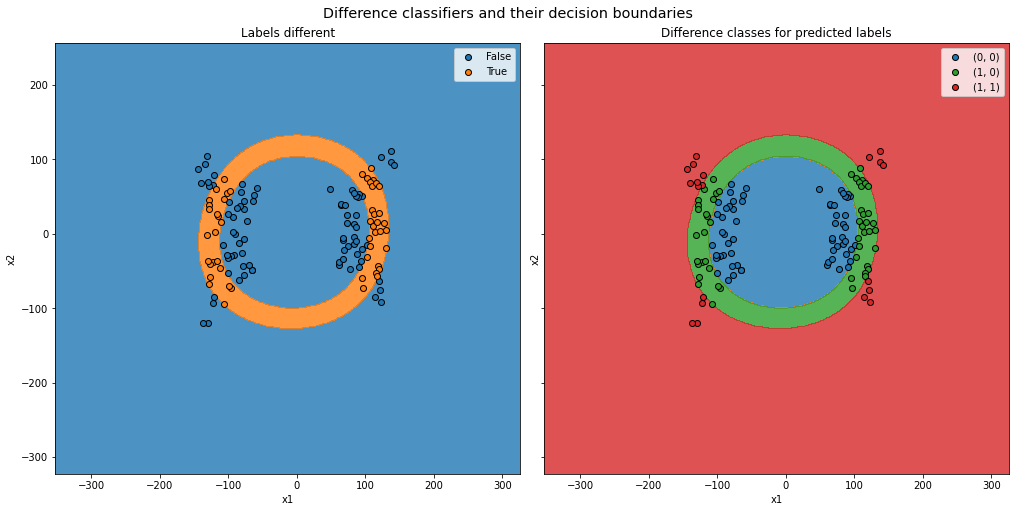

In [148]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

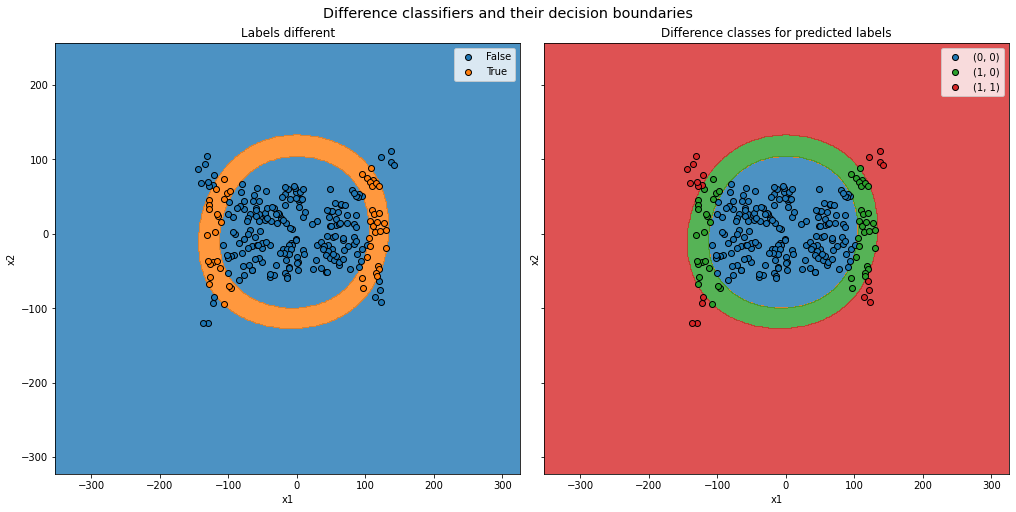

In [139]:
comparer.plot_decision_boundaries(node.parent.shap_values.data, xlim=xlim, ylim=ylim, mesh_step_size=1)

Locally, the effects are different on the log odds outcome of $(1,0)$ and $(1,1)$ than in neighboring clusters.

I stop at this level, because lower level clusters again would do not provide more insights.